In [4]:
# Install required libraries
# !pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



In [5]:
# Sample Dataset: Company growth over years
data = {
    'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Revenue ($M)': [5, 10, 15, 25, 40, 60, 85, 110, 150]  # Revenue over time
}

# Convert to DataFrame
# df = pd.DataFrame("/content/companies_data.csv") # Incorrect: This tries to create a DataFrame from a string path.
df = pd.DataFrame(data)  # Correct: Create DataFrame from the 'data' dictionary

In [6]:
# Prepare Features (X) and Target (y)
X = df[['Year']]
y = df['Revenue ($M)']


In [7]:
# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# **Predict Future Revenue for Next 5 Years (2024 - 2028)**
future_years = np.array([[2024], [2025], [2026], [2027], [2028]])
lr_future_preds = lr_model.predict(future_years)
rf_future_preds = rf_model.predict(future_years)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<Axes: xlabel='Year', ylabel='Revenue ($M)'>

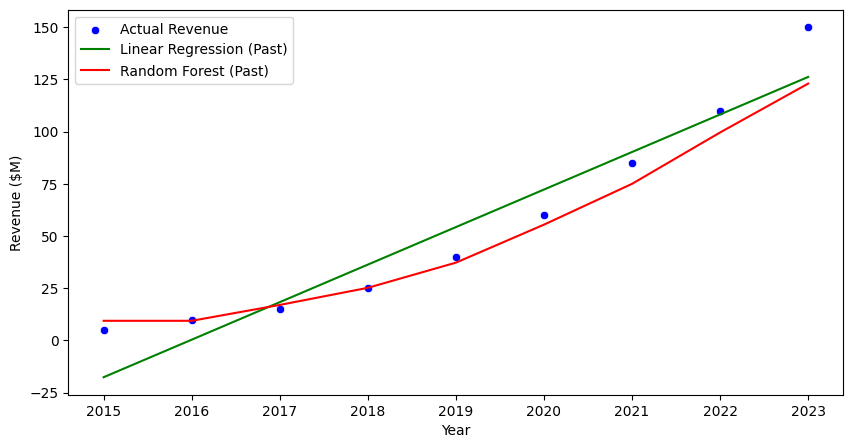

In [11]:
# **Visualization**
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Year'], y=df['Revenue ($M)'], color='blue', label="Actual Revenue")
sns.lineplot(x=df['Year'], y=lr_model.predict(X), color='green', label="Linear Regression (Past)")
sns.lineplot(x=df['Year'], y=rf_model.predict(X), color='red', label="Random Forest (Past)")

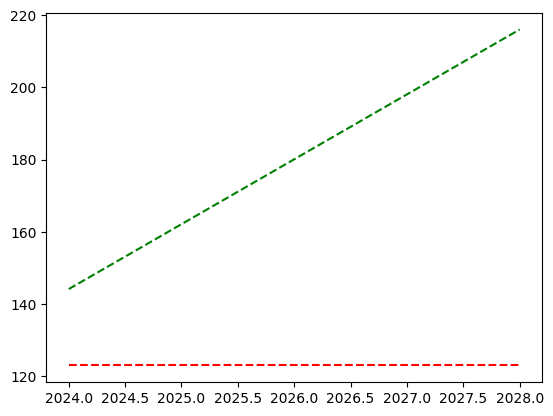

In [12]:
# Plot Future Predictions
plt.plot(future_years, lr_future_preds, 'g--', label="Linear Regression (Future)")
plt.plot(future_years, rf_future_preds, 'r--', label="Random Forest (Future)")

<ipython-input-13-968bd19e61cf>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


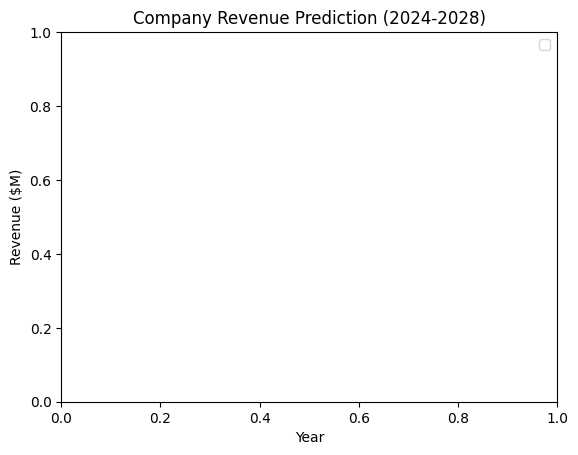

In [13]:
plt.xlabel("Year")
plt.ylabel("Revenue ($M)")
plt.title("Company Revenue Prediction (2024-2028)")
plt.legend()
plt.show()


In [14]:
# Display Future Predictions
future_df = pd.DataFrame({'Year': future_years.flatten(),
                          'Linear Regression Prediction': lr_future_preds,
                          'Random Forest Prediction': rf_future_preds})
print(future_df)

   Year  Linear Regression Prediction  Random Forest Prediction
0  2024                    144.166667                     123.0
1  2025                    162.142857                     123.0
2  2026                    180.119048                     123.0
3  2027                    198.095238                     123.0
4  2028                    216.071429                     123.0
